In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.models import Sequential
from keras.utils import np_utils
import theano

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce 920M (CNMeM is disabled, cuDNN 5110)


In [35]:
X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')

In [36]:
print X_train.shape, Y_train.shape

(60000, 784) (60000,)


In [37]:
X_train = X_train.reshape((60000,28,28))

In [38]:
Y_train = np_utils.to_categorical(Y_train)

In [39]:
X_train.shape , Y_train.shape

((60000, 28, 28), (60000, 10))

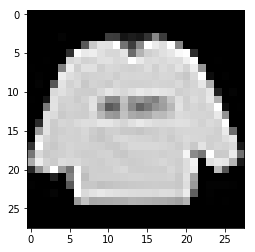

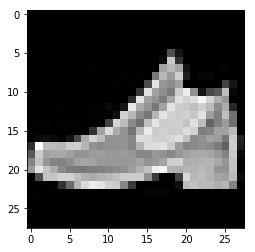

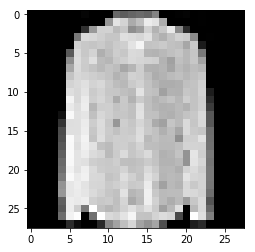

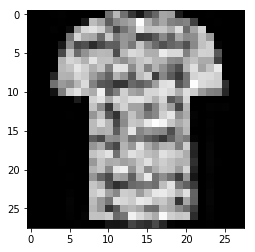

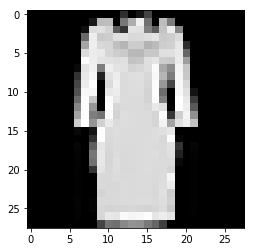

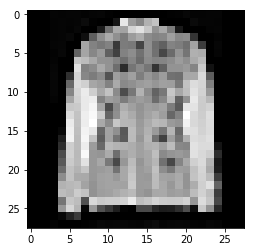

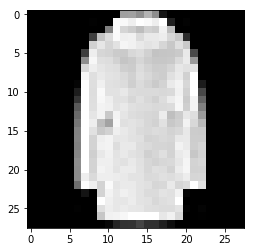

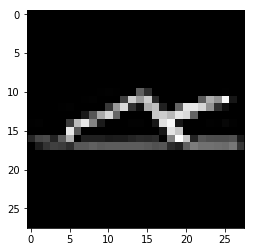

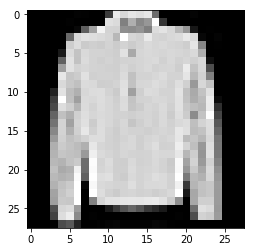

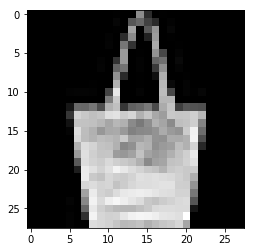

In [40]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(X_train[ix], interpolation='none', cmap='gray')
plt.show()

In [41]:
print X_train.max(), X_train.min()
X_train = X_train/255.0
print X_train.max(), X_train.min()

255 0
1.0 0.0


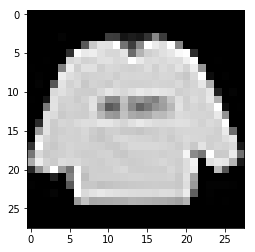

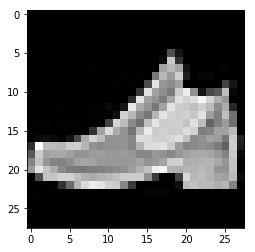

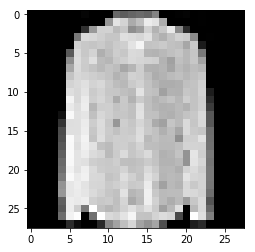

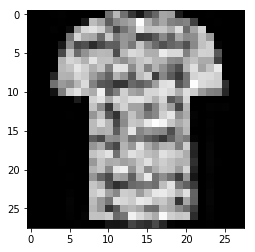

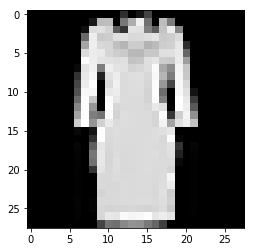

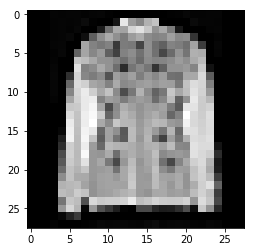

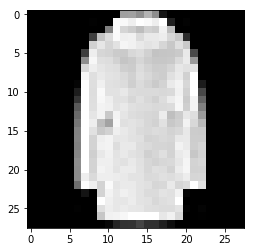

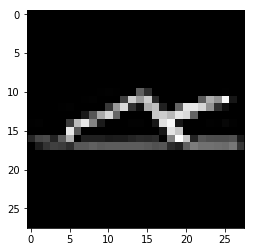

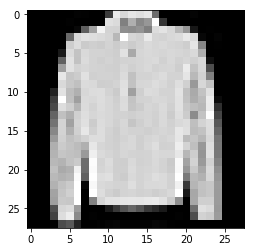

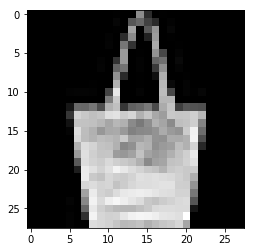

In [42]:
for ix in range(10):
    plt.figure(ix)
    plt.imshow(X_train[ix], interpolation='none', cmap='gray')
plt.show()

In [43]:
X_train = X_train.reshape((60000,28,28,1))

In [62]:
model = Sequential()
model.add(Convolution2D(32, (5,5),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64, (5,5),activation='relu'))
#model.add(Convolution2D(128, (3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
#model.add(Convolution2D(64, (3,3),activation='relu'))
#model.add(Convolution2D(32, (3,3),activation='relu'))
model.add(Convolution2D(32,(5,5),activation='relu'))
#model.add(MaxPooling2D(2,2))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 6, 6, 32)          51232     
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 2, 2, 8)           6408      
_________________________________________________________________
flatten_13 (Flatten)         (None, 32)                0         
__________

In [63]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
hist = model.fit(X_train,Y_train,
                 epochs=5,
                 shuffle=True,
                 batch_size=256,
                 validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 105s - loss: 0.2832 - acc: 0.8976 - val_loss: 0.2783 - val_acc: 0.9016
Epoch 2/5
48000/48000 [==============================] - 104s - loss: 0.2744 - acc: 0.9005 - val_loss: 0.2739 - val_acc: 0.9033
Epoch 3/5
48000/48000 [==============================] - 105s - loss: 0.2687 - acc: 0.9015 - val_loss: 0.2720 - val_acc: 0.9039
Epoch 4/5
48000/48000 [==============================] - 105s - loss: 0.2570 - acc: 0.9071 - val_loss: 0.2629 - val_acc: 0.9079
Epoch 5/5
48000/48000 [==============================] - 105s - loss: 0.2546 - acc: 0.9075 - val_loss: 0.2665 - val_acc: 0.9053


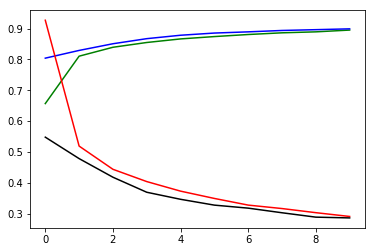

In [65]:
#first 10 epochs
plt.plot(hist.history['acc'],'g')
plt.plot(hist.history['val_acc'],'b')
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'black')

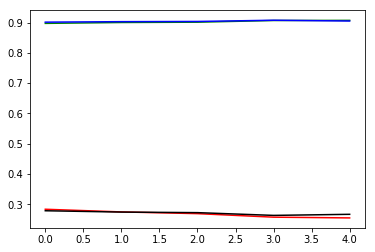

In [67]:
#next 5 epochs
plt.plot(hist.history['acc'],'g')
plt.plot(hist.history['val_acc'],'b')
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'black')